# 4. Data Science Process - Model with Data

### Criteria for Evaluation
Preprocessing and Modeling
- Are categorical variables one-hot encoded?
- Does the student investigate or manufacture features with linear relationships to the target?
- Have the data been scaled appropriately?
- Does the student properly split and/or sample the data for validation/training purposes?
- Does the student utilize feature selection to remove noisy or multi-collinear features?
- Does the student test and evaluate a variety of models to identify a production algorithm (AT MINIMUM: linear regression, lasso, and ridge)?
- Does the student defend their choice of production model relevant to the data at hand and the problem?
- Does the student explain how the model works and evaluate its performance successes/downfalls?

In [519]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
import sklearn.preprocessing as skpp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

In [520]:
df_train_clean_eda = pd.read_csv("./datasets/train_clean_eda.csv", na_filter=False)

In [521]:
df_test_clean_eda = pd.read_csv("./datasets/test_clean_eda.csv", na_filter=False)

In [522]:
df_train_clean_eda.shape

(2051, 80)

In [523]:
df_test_clean_eda.shape

(878, 79)

In [524]:
df_train_test_clean_eda = pd.concat([df_train_clean_eda, df_test_clean_eda], axis=0) # Stack vertically

In [525]:
df_train_test_clean_eda.shape

(2929, 80)

In [526]:
df_train_test_clean_eda

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,3,2010,WD,130500.0
1,544,531379050,60,RL,11492,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2009,WD,220000.0
2,153,535304180,20,RL,7922,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,1,2010,WD,109000.0
3,318,916386060,60,RL,9802,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2010,WD,174000.0
4,255,906425045,50,RL,14235,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,3,2010,WD,138500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,8000,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,11,2007,WD,NaN
874,1234,535126140,60,RL,14670,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,8,2008,WD,NaN
875,1373,904100040,20,RL,8250,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,8,2008,WD,NaN
876,1672,527425140,20,RL,9000,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,GdWo,NA,0,5,2007,WD,NaN


In [527]:
cat_var = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type', 'Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Overall Qual', 'Overall Cond']

In [528]:
df_train_test_dummies = pd.get_dummies(df_train_test_clean_eda, columns = cat_var, drop_first = True)

In [529]:
df_train_test_dummies

,Id,PID,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Overall Qual_9,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9
0,109,533352170,13517,1976,2005,289.0,533.0,0.0,192.0,725.0,...,0,0,0,0,0,0,0,0,1,0
1,544,531379050,11492,1996,1997,132.0,637.0,0.0,276.0,913.0,...,0,0,0,0,0,1,0,0,0,0
2,153,535304180,7922,1953,2007,0.0,731.0,0.0,326.0,1057.0,...,0,0,0,0,0,0,0,1,0,0
3,318,916386060,9802,2006,2007,0.0,0.0,0.0,384.0,384.0,...,0,0,0,0,0,1,0,0,0,0
4,255,906425045,14235,1900,1993,0.0,0.0,0.0,676.0,676.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,8000,1974,1974,0.0,931.0,153.0,0.0,1084.0,...,0,0,0,0,0,0,1,0,0,0
874,1234,535126140,14670,1966,1999,410.0,575.0,0.0,529.0,1104.0,...,0,0,0,0,0,0,0,1,0,0
875,1373,904100040,8250,1968,1968,0.0,250.0,492.0,210.0,952.0,...,0,0,0,0,0,1,0,0,0,0
876,1672,527425140,9000,1971,1971,0.0,616.0,0.0,248.0,864.0,...,0,0,0,0,0,0,1,0,0,0


In [530]:
df_train_test_dummies.shape

(2929, 308)

### Feature Engineering

In [531]:
df_train_test_dummies['Gr Liv Area * Overall Qual_9'] = df_train_test_dummies['Gr Liv Area'] * df_train_test_dummies['Overall Qual_9']

In [532]:
df_train_test_dummies['Gr Liv Area * Year Built'] = df_train_test_dummies['Gr Liv Area'] * df_train_test_dummies['Year Built']

In [533]:
df_train_test_dummies['Gr Liv Area * Total Bsmt SF'] = df_train_test_dummies['Gr Liv Area'] * df_train_test_dummies['Total Bsmt SF']

In [534]:
df_train_test_dummies['Gr Liv Area * BsmtFin SF 1'] = df_train_test_dummies['Gr Liv Area'] * df_train_test_dummies['BsmtFin SF 1']

In [535]:
df_train_test_dummies.shape

(2929, 312)

In [536]:
df_train_test_dummies.iloc[2040:2060,:]

,Id,PID,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,Gr Liv Area * Overall Qual_9,Gr Liv Area * Year Built,Gr Liv Area * Total Bsmt SF,Gr Liv Area * BsmtFin SF 1
2040,2728,905225080,15593,1953,1953,0.0,603.0,0.0,701.0,1304.0,...,1,0,0,0,0,0,0,4466511,2982248.0,1379061.0
2041,1065,528166120,13688,2003,2004,664.0,1016.0,0.0,556.0,1572.0,...,0,1,0,0,0,0,2668,5344004,4194096.0,2710688.0
2042,2842,909101080,8248,1922,1950,0.0,0.0,0.0,864.0,864.0,...,1,0,0,0,0,0,0,2717708,1221696.0,0.0
2043,2011,903227140,6000,1939,1950,0.0,276.0,0.0,324.0,600.0,...,0,0,1,0,0,0,0,2388848,739200.0,340032.0
2044,1140,531382090,8453,1995,1995,38.0,362.0,0.0,392.0,754.0,...,0,1,0,0,0,0,0,3209955,1213186.0,582458.0
2045,1051,528102030,12444,2008,2008,426.0,1336.0,0.0,596.0,1932.0,...,0,1,0,0,0,0,0,3879456,3732624.0,2581152.0
2046,1587,921126030,11449,2007,2007,0.0,1011.0,0.0,873.0,1884.0,...,0,1,0,0,0,0,0,3468096,3255552.0,1747008.0
2047,785,905377130,12342,1940,1950,0.0,262.0,0.0,599.0,861.0,...,0,1,0,0,0,0,0,1670340,741321.0,225582.0
2048,916,909253010,7558,1928,1950,0.0,0.0,0.0,896.0,896.0,...,0,0,1,0,0,0,0,3688264,1714048.0,0.0
2049,639,535179160,10400,1956,1956,0.0,155.0,750.0,295.0,1200.0,...,0,1,0,0,0,0,0,2347200,1440000.0,186000.0


In [537]:
# Put train_dummies and test_dummies into their respective df
df_train_dummies = df_train_test_dummies.iloc[0:2051 ,:]
df_test_dummies = df_train_test_dummies.iloc[2051:,:]

In [538]:
df_train_dummies.shape

(2051, 312)

In [539]:
df_test_dummies.shape

(878, 312)

In [540]:
df_train_dummies['SalePrice'].sum()

372194358.0

In [541]:
df_test_dummies['SalePrice'].sum()

0.0

### Create predictor (independent) and target (dependent) variables. Standardize the predictors.

In [542]:
#df_train_dummies
features_train_dummies = [col for col in df_train_dummies._get_numeric_data().columns if col!='SalePrice']
X_train = df_train_dummies[features_train_dummies]
y_train = df_train_dummies['SalePrice']

In [543]:
#Model Prep: Train/test split
# Split X_train into X_train_valid (train) and X_valid (validation)
# Split y_train into y_train_valid (train) and y_valid (validation)
X_train_valid, X_valid, y_train_valid, y_valid = train_test_split(X_train, y_train, random_state=42)

In [544]:
#df_test_dummies
features_test_dummies = [col for col in df_test_dummies._get_numeric_data().columns if col!='SalePrice']
X_test = df_test_dummies[features_test_dummies]
y_test = df_test_dummies['SalePrice']

In [545]:
ss = StandardScaler()
ss.fit(X_train_valid)
X_train_valid_scal = ss.transform(X_train_valid) # Scaling X_train_valid
X_valid_scal = ss.transform(X_valid) # Scaling X_valid
X_test_scal = ss.transform(X_test) # Scaling X_test

### The Null Model or Baseline Score
If we had to guess the "SalePrice" for any house, we would probably pick the mean "SalePrice" of all the houses.

In [546]:
df_train_dummies['SalePrice'].mean()

181469.70160897123

### Build a linear regression predicting "SalePrice" from the rest of the columns.

In [547]:
#linreg = LinearRegression()

#linreg_scores = cross_val_score(linreg, X_train_scal, y_train, cv=10)

#print (linreg_scores)
#print (np.mean(linreg_scores))

In [548]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, X_train_valid_scal, y_train_valid, cv=10)

print (linreg_scores)
print (np.mean(linreg_scores))

[-7.81952202e+24 -4.18642135e+19 -4.28430127e+19 -5.51504544e+20
 -6.66308577e+18 -1.21923517e+22 -1.00742458e+18 -3.01420190e+24
 -4.36894215e+21 -2.50411531e+22]
-1.0875970239468627e+24


In [549]:
linreg.fit(X_train_valid_scal, y_train_valid)
linreg.score(X_train_valid_scal, y_train_valid) # Probably due to Overfitting

0.9553473794993013

### Observation
The mean R^2 from cross_val_score for Linear Regression is extremely negative. 
 All the R^2 scores are negative in crossvalidation.
 The Linear Regression is performing far worse than baseline on the train sets.
 It is probably dramatically overfitting and the redundant variables are affecting the coefficients in weird ways.

### Find an optimal value for Ridge regression alpha using "RidgeCV"

In [550]:
#%%time
#ridge_alphas = np.logspace(0, 5, 200)

#optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
#optimal_ridge.fit(X_train_scal, y_train)

#print (optimal_ridge.alpha_)

In [551]:
%%time
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_valid_scal, y_train_valid)

print (optimal_ridge.alpha_)

30.36771118035459
Wall time: 16 s


### Cross-validate the Ridge regression $R^2$ with the optimal alpha.

In [552]:
#ridge = Ridge(alpha=optimal_ridge.alpha_)

#ridge_scores = cross_val_score(ridge, X_train_scal, y_train, cv=10)

#print (ridge_scores)
#print (np.mean(ridge_scores))

In [553]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train_valid_scal, y_train_valid, cv=10)

print (ridge_scores)
print (np.mean(ridge_scores))

[0.92950212 0.92047553 0.84490924 0.90087513 0.83790965 0.91979753
 0.91985102 0.82857683 0.50711638 0.90343341]
0.8512446841393162


In [554]:
ridge.fit(X_train_valid_scal, y_train_valid)
ridge.score(X_train_valid_scal, y_train_valid)

0.9421745080125637

In [555]:
ridge.fit(X_valid_scal, y_valid)
ridge.score(X_valid_scal, y_valid) 
#Ridge R Square Score has improved from train to validation dataset, signifying lower probability of overfitting 

0.9684873883445125

### Observation
The mean R^2 from cross_val_score for Ridge Regression is vastly better than the Linear Regression. 
 There is likely so much multicollinearity in the data that "vanilla" regression overfits and has bogus coefficients on predictors.  Ridge is able to manage the multicollinearity and get a good out-of-sample result.

In [556]:
pred_ridge_test = ridge.predict(X_test_scal) # Test dataset

In [557]:
pred_ridge_test

array([127877.8447898 , 163533.58792303, 212293.38599008, 115118.47290265,
       178297.23019123,  80244.09437136, 119276.15565031, 148021.14418128,
       176808.87549581, 156153.97411494, 146986.62532234, 128427.1612049 ,
       119700.47903186, 265698.39358759, 153948.41229147, 122373.75200343,
       175503.42136911, 116023.09189432, 211861.17908647, 161113.5817937 ,
       140064.63197319, 129950.21073537, 188234.42308845, 151556.47551358,
       181010.51538536, 117091.39620225, 125857.30687586, 119435.54629158,
       169296.01123661,  59384.77495927, 114764.89762783,  98004.97410082,
       228392.33329331, 139384.67987661, 207183.19724811, 175335.4371182 ,
       126111.63720462, 117463.14474958, 122214.79918113, 192465.57069226,
       159233.53367356, 192038.80324991, 154263.77991985, 164578.61054267,
       209541.40127321,  97121.08463797, 207135.58189952, 113354.2206715 ,
       135658.41256018, 119850.2744928 , 100423.35404368, 197792.0666277 ,
       243422.55800098, 1

In [558]:
pred_ridge_validation = ridge.predict(X_valid_scal) # Train Validation dataset

In [559]:
df_test_submit_ridge = pd.read_csv("./datasets/test.csv", na_filter=False)

In [560]:
df_test_submit_ridge.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,,9662,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58,17104,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60,8520,Pave,NA,Reg,Lvl,...,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,,9500,Pave,NA,IR1,Lvl,...,0,185,0,NA,NA,NA,0,7,2009,WD


In [561]:
df_test_submit_ridge = pd.concat([df_test_submit_ridge['Id'], pd.DataFrame(pred_ridge_test)], axis=1)

In [562]:
df_test_submit_ridge.columns = ['Id', 'SalePrice']

In [563]:
df_test_submit_ridge.to_csv("./datasets/submission_ridge_final.csv", index=False)

In [564]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_valid , pred_ridge_validation))

13910.004129452198

### Find an optimal value for Lasso regression alpha using "LassoCV"

In [565]:
optimal_lasso = LassoCV(n_alphas=1000, cv=10, verbose=1)
optimal_lasso.fit(X_train_valid_scal, y_train_valid)

print (optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

327.12949226767313


### Cross-validate the Lasso $R^2$ with the optimal alpha.

In [566]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train_valid_scal, y_train_valid, cv=10)
print (lasso_scores)
print (np.mean(lasso_scores))

[0.9226262  0.92113368 0.87128859 0.90385391 0.84144887 0.92297339
 0.92557255 0.85889091 0.45415721 0.91658687]
0.8538532168890323


In [567]:
lasso.fit(X_train_valid_scal, y_train_valid)

Lasso(alpha=327.12949226767313)

In [568]:
lasso.score(X_train_valid_scal, y_train_valid)

0.9349393939806893

In [569]:
lasso.fit(X_valid_scal, y_valid)

Lasso(alpha=327.12949226767313)

In [570]:
lasso.score(X_valid_scal, y_valid)
#Lasso R Square Score has improved from train to validation dataset, signifying lower probability of overfitting 

0.9650167426506199

### Observation
The Lasso performs slightly better than the Ridge in cross val score, but similarly.
 Lasso deals primarily with the feature selection of valuable variables, eliminating ones that are not useful. 
 This also takes care of multicollinearity, but in a different way: it will choose the "best" of the correlated  variables and zero-out the other redundant ones.
  There may also be useless variables in the data which it is simply getting rid of entirely.

### Look at the coefficients for variables in the Lasso

In [571]:
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(40)

,variable,coef,abs_coef
309,Gr Liv Area * Total Bsmt SF,25197.406009,25197.406009
308,Gr Liv Area * Year Built,16301.466949,16301.466949
3,Year Built,11712.622507,11712.622507
297,Overall Qual_9,11679.208418,11679.208418
310,Gr Liv Area * BsmtFin SF 1,11532.728861,11532.728861
298,Overall Qual_10,9239.177033,9239.177033
296,Overall Qual_8,7382.538583,7382.538583
24,Garage Area,5638.153384,5638.153384
212,Bsmt Qual_Gd,-5111.613532,5111.613532
284,Pool QC_NA,-4772.144670,4772.144670


In [572]:
lasso_coefs.to_csv("./datasets/lasso_coefs_train_valid.csv", index=True)

In [573]:
pred_lasso_test = lasso.predict(X_test_scal) # Test dataset

In [574]:
pred_lasso_test

array([143731.42549682, 163781.17927436, 209383.32791348, 114048.93358198,
       177245.53512738,  86889.41785941, 118436.03968451, 153086.63387171,
       180919.08268273, 162505.2010467 , 151652.32587077, 119952.28754422,
       130928.89102902, 262205.85304014, 158633.41799294, 128901.45232621,
       174958.40374417, 120711.44507297, 219816.67106032, 160777.76789657,
       140264.67559005, 123797.0923609 , 192212.71612925, 161317.73484491,
       178671.70497788, 123449.81621711, 119226.11744487, 115731.72842364,
       161997.39468886,  70680.6443234 , 122474.24567311, 102379.17675784,
       219834.52319383, 143556.3111893 , 206425.89101493, 174747.9679031 ,
       128136.55881831, 101418.14387621, 121343.49279176, 188349.92410938,
       165674.05276484, 189169.81402457, 153858.65172047, 160426.60075195,
       207713.00219169,  92453.53423007, 210339.3134035 , 119571.91717929,
       134359.27661135, 115720.10546436, 108400.86761126, 183509.74230625,
       246606.02749735, 1

In [575]:
pred_lasso_validation = lasso.predict(X_valid_scal) # Train Validation dataset

In [576]:
#print ('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X_train.shape[0]))

In [577]:
df_test_submit_lasso = pd.read_csv("./datasets/test.csv", na_filter=False)

In [578]:
df_test_submit_lasso.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,,9662,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58,17104,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60,8520,Pave,NA,Reg,Lvl,...,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,,9500,Pave,NA,IR1,Lvl,...,0,185,0,NA,NA,NA,0,7,2009,WD


In [579]:
df_test_submit_lasso = pd.concat([df_test_submit_lasso['Id'], pd.DataFrame(pred_lasso_test)], axis=1)

In [580]:
df_test_submit_lasso.columns = ['Id', 'SalePrice']

In [581]:
df_test_submit_lasso.to_csv("./datasets/submission_lasso_final.csv", index=False)

In [582]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_valid , pred_lasso_validation))

14655.990763917167

### Remove Coefficients = 0 from Lasso Regression and run Linear, Ridge and Lasso Regression again

In [583]:
drop_columns = lasso_coefs[lasso_coefs["abs_coef"] == 0]["variable"].tolist()

In [584]:
drop_columns

['Bsmt Qual_Po',
 'Functional_Maj2',
 'Bsmt Cond_Po',
 'Bsmt Cond_NA',
 'Functional_Sal',
 'Bsmt Cond_Fa',
 'Exter Qual_Gd',
 'Overall Qual_6',
 'Bsmt Qual_UnKn',
 'Garage Qual_Fa',
 'Bsmt Qual_NA',
 'Exter Cond_Gd',
 'Exter Cond_Po',
 'Fence_NA',
 'Overall Qual_5',
 'Garage Qual_Po',
 'Garage Qual_Gd',
 'Exter Cond_TA',
 'Functional_Min2',
 'Electrical_FuseP',
 'Bsmt Cond_TA',
 'Bsmt Cond_UnKn',
 'Fireplace Qu_NA',
 'Heating QC_Po',
 'Heating QC_Gd',
 'Heating QC_Fa',
 'Electrical_Mix',
 'BsmtFin Type 2_Unf',
 'BsmtFin Type 2_UnKn',
 'Overall Cond_6',
 'Electrical_SBrkr',
 'BsmtFin Type 2_NA',
 'Garage Cond_TA',
 'Electrical_UnKn',
 'BsmtFin Type 1_Unf',
 'BsmtFin Type 1_UnKn',
 'Paved Drive_Y',
 'Garage Cond_Po',
 'BsmtFin Type 1_NA',
 'Garage Finish_RFn',
 'Pool QC_Fa',
 'Gr Liv Area * Overall Qual_9',
 'Fireplace Qu_Gd',
 'Pool QC_TA',
 'Fence_GdWo',
 'Bsmt Exposure_NA',
 'Electrical_FuseF',
 'Kitchen Qual_Po',
 'Fence_MnWw',
 'Bsmt Exposure_UnKn',
 'Id',
 'Utilities_NoSewr',
 'MS 

In [585]:
X_train_valid_regularised = X_train_valid.drop(columns=drop_columns)

In [586]:
X_train_valid_regularised.shape

(1538, 153)

In [587]:
X_valid_regularised = X_valid.drop(columns=drop_columns)

In [588]:
X_valid_regularised.shape

(513, 153)

In [589]:
X_test_regularised = X_test.drop(columns=drop_columns)

In [590]:
X_test_regularised.shape

(878, 153)

### Standardize the predictors.

In [591]:
ss = StandardScaler()
ss.fit(X_train_valid_regularised)
X_train_valid_regularised_scal = ss.transform(X_train_valid_regularised) # Scaling
X_valid_regularised_scal = ss.transform(X_valid_regularised) # Scaling
X_test_regularised_scal = ss.transform(X_test_regularised) # Scaling 

### Build a linear regression predicting "SalePrice" from the rest of the columns : Cross Val Score

In [592]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, X_train_valid_regularised_scal, y_train_valid, cv=10)

print (linreg_scores)
print (np.mean(linreg_scores))

[ 9.14411598e-01  8.95064168e-01  8.00364288e-01  8.63162801e-01
  8.22851173e-01  8.93252278e-01  9.15358481e-01  8.07170248e-01
  6.97859265e-01 -1.26636017e+16]
-1266360168311671.5


### Find an optimal value for Ridge regression alpha using "RidgeCV"

In [593]:
%%time
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_valid_regularised_scal, y_train_valid)

print (optimal_ridge.alpha_)

1.1895340673703196
Wall time: 8.27 s


### Cross-validate the Ridge regression $R^2$ with the optimal alpha.

In [594]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train_valid_regularised_scal, y_train_valid, cv=10)

print (ridge_scores)
print (np.mean(ridge_scores))

[0.91454098 0.8951133  0.8004794  0.86337075 0.82311593 0.89332784
 0.91534065 0.8069738  0.6970247  0.89201439]
0.8501301739459887


In [595]:
ridge.fit(X_train_valid_regularised_scal, y_train_valid)
ridge.score(X_train_valid_regularised_scal, y_train_valid)

0.9058796953473678

In [596]:
ridge.fit(X_valid_regularised_scal, y_valid)
ridge.score(X_valid_regularised_scal, y_valid)

0.9692882678642322

### Find an optimal value for Lasso regression alpha using "LassoCV"

In [597]:
optimal_lasso = LassoCV(n_alphas=1000, cv=10, verbose=1)
optimal_lasso.fit(X_train_valid_regularised_scal, y_train_valid)

print (optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

132.22887597698406


.........................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.5s finished


### Cross-validate the Lasso $R^2$ with the optimal alpha.

In [598]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train_valid_regularised_scal, y_train_valid, cv=10)
print (lasso_scores)
print (np.mean(lasso_scores))

[0.9168673  0.89400842 0.80846737 0.86712977 0.83443179 0.89656558
 0.91762053 0.8075263  0.68033793 0.90252691]
0.8525481886404254


In [599]:
lasso.fit(X_train_valid_regularised_scal, y_train_valid)

Lasso(alpha=132.22887597698406)

In [600]:
lasso.score(X_train_valid_regularised_scal, y_train_valid)

0.9051674289490327

In [601]:
lasso.fit(X_valid_regularised_scal, y_valid)

Lasso(alpha=132.22887597698406)

In [602]:
lasso.score(X_valid_regularised_scal, y_valid)

0.9685874286486038

# 5. Data Science Process - Evaluate Model

### Criteria for Evaluation
Evaluation and Conceptual Understanding
- Does the student accurately identify and explain the baseline score?
- Does the student select and use metrics relevant to the problem objective?
- Is more than one metric utilized in order to better assess performance?
- Does the student interpret the results of their model for purposes of inference?
- Is domain knowledge demonstrated when interpreting results?
- Does the student provide appropriate interpretation with regards to descriptive and inferential statistics?

# 6. Data Science Process - Answer Problem

### Criteria for Evaluation
Conclusion and Recommendations
- Does the student provide appropriate context to connect individual steps back to the overall project?
- Is it clear how the final recommendations were reached?
- Are the conclusions/recommendations clearly stated?
- Does the conclusion answer the original problem statement?
- Does the student address how findings of this research can be applied for the benefit of stakeholders?
- Are future steps to move the project forward identified?

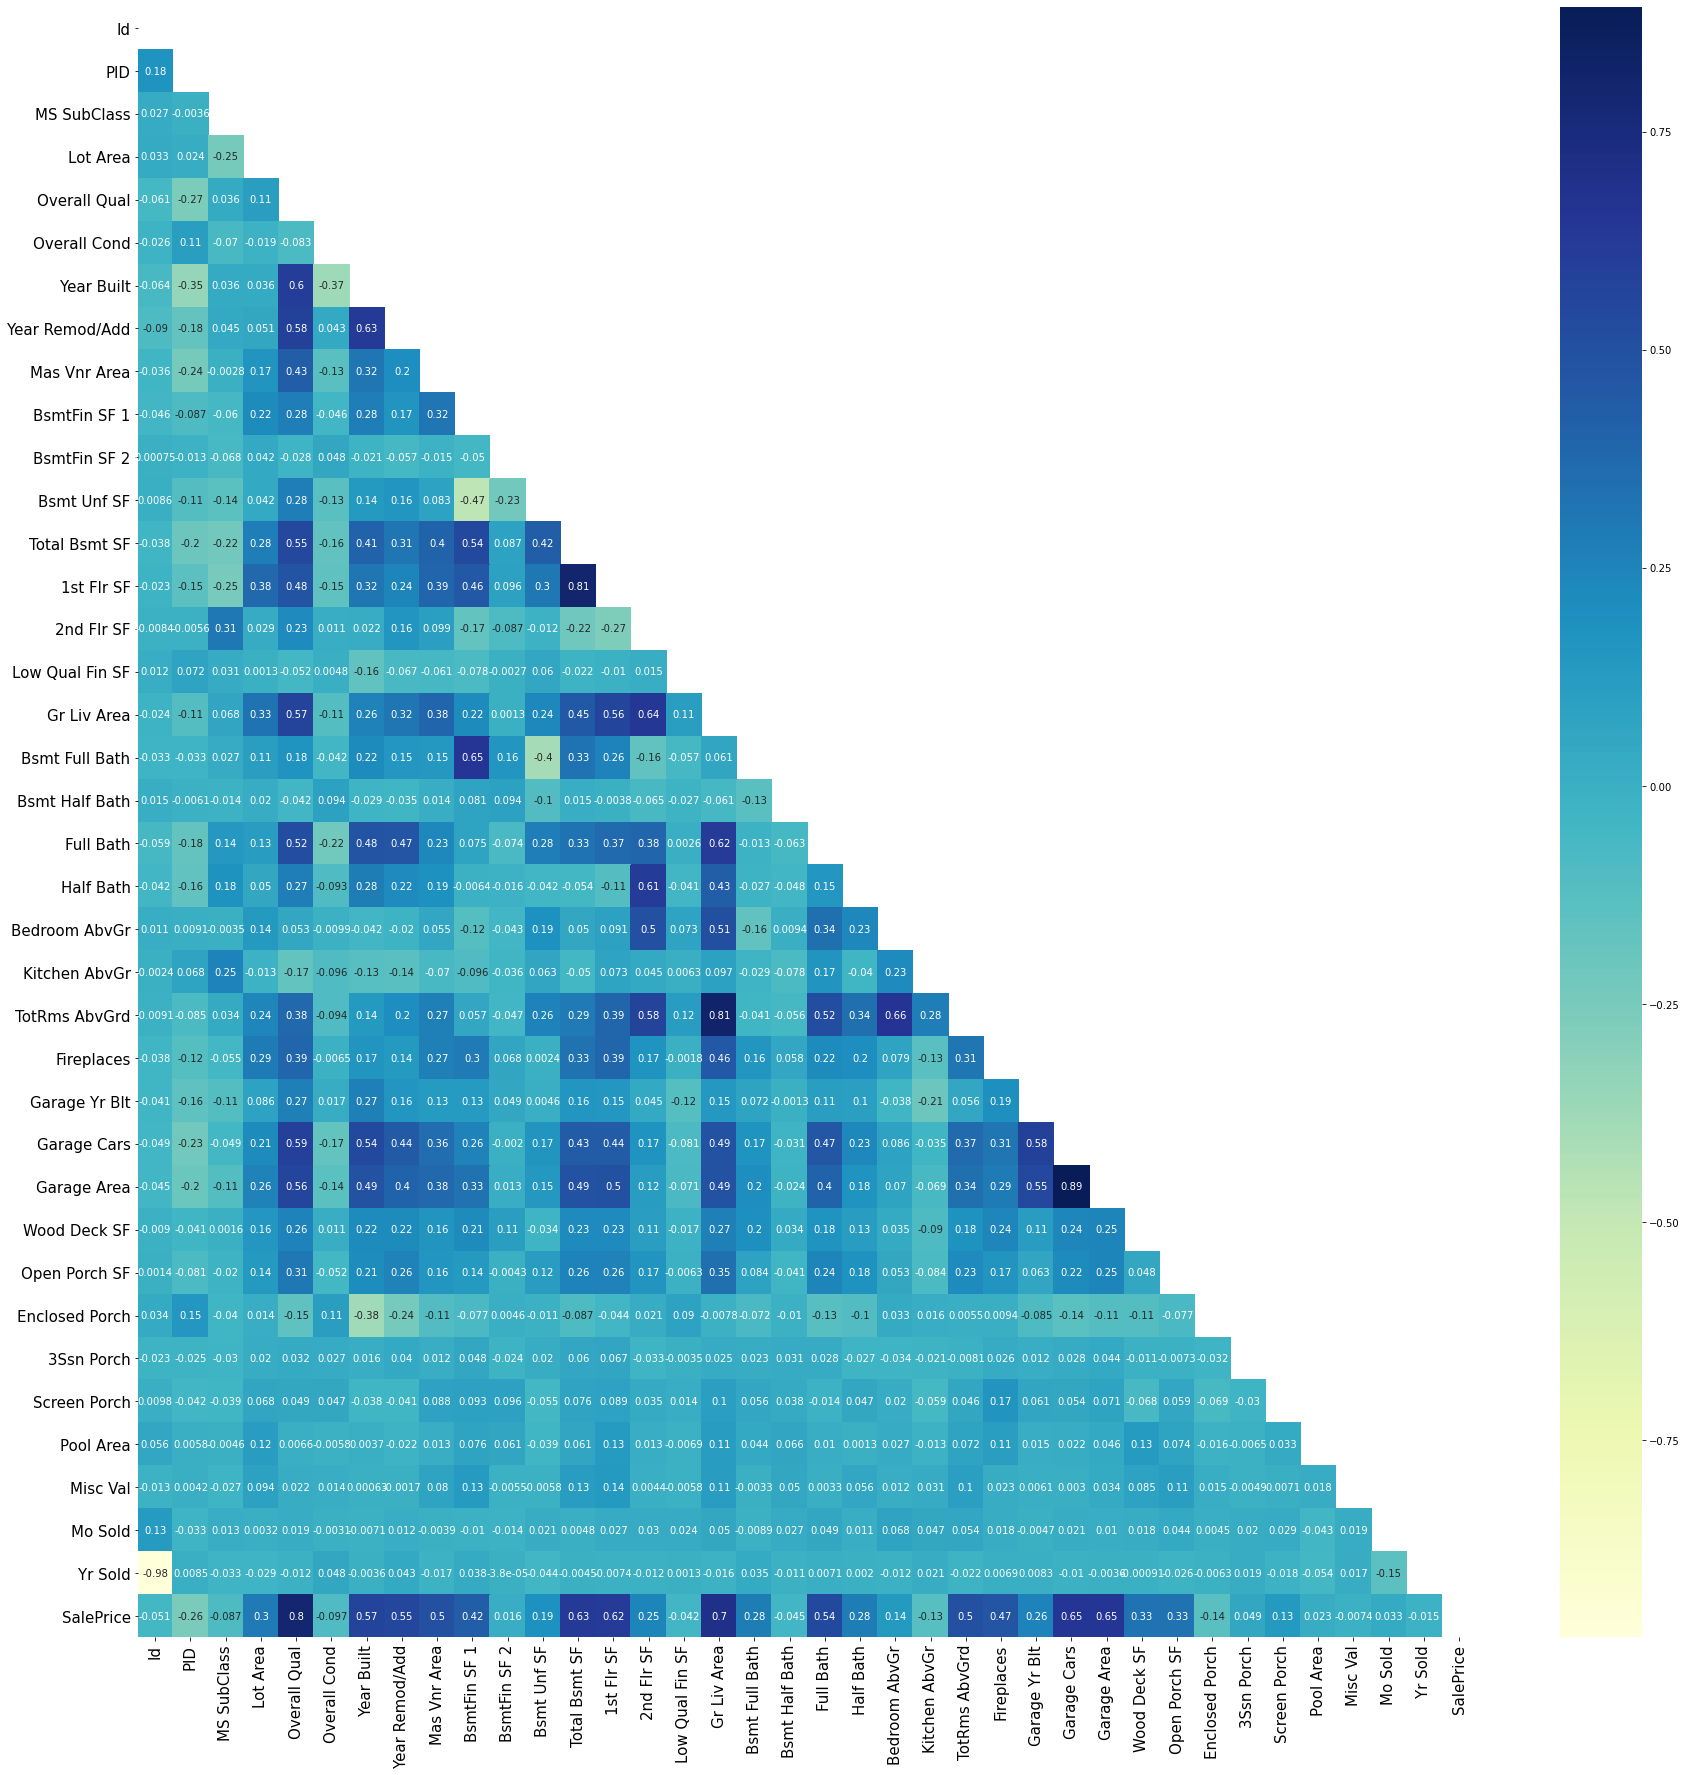

In [604]:
## inspecting correlation via heatmap to identify feature variables 
fix, ax = plt.subplots(figsize=(30,30))
mask = np.zeros_like(df_train_clean_eda.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_train_clean_eda.corr(), mask = mask, ax= ax, annot = True ,cmap = 'YlGnBu');

#adjusting size of ticklabels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=15);
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=15);

In [605]:
# displaying features with highest correlation to sale price column - Overall quality columns appears to have 
# the highest correlation. 
print("Find most important features relative to target")
corr = df_train_clean_eda.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650246
Garage Cars        0.648128
Total Bsmt SF      0.629303
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
TotRms AbvGrd      0.504014
Mas Vnr Area       0.503519
Fireplaces         0.471093
BsmtFin SF 1       0.423857
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Half Bath          0.283001
Bsmt Full Bath     0.282390
Garage Yr Blt      0.255061
2nd Flr SF         0.248452
Bsmt Unf SF        0.190862
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016436
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.044921
Id                -0.051398
MS SubClass       -0.087335
